In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import gzip
import seaborn as sn
from sklearn.decomposition import PCA

# dataset 1 contacts.dat.gz

The file contacts.dat.gz contains information about contacts during the simulated pulling of a protein. The experiment corresponds to AFM measurements, in which a protein is unfolded by pulling it, during which the force is measured. The unfolding is associated with the loss of contacts between atoms in the structure. The aim of the simulations is to provide a physical understanding of the process in the experiments. The first column contains the time (arbitrary units), the second column contains the position of the AFM tip, the third column contains the force exerted on the tip. The remaining columns correspond to contacts, in which a 1 indicates the contact is present and a 0 indicates the contact is not present.

## reading the data
no fuck this. go home go to bed

# dataset 4 lysozyme_rmsds.csv

The file lysozyme_rmsds.csv contains a __distance matrix__ of a selection of lysozyme structures from the Protein DataBank (PDB). Lysozyme is one of the most used/studied proteins, with >5400 structures available in the database. Distances were determined as root-mean-square deviation (RMSD) after least-squares alignment using the CE align algorithm.

## reading the data

In [2]:
df = pd.read_csv('lysozyme_rmsds.csv')
df.head()

,Unnamed: 0,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,1ta0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,5m1y,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,1flq,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,4ru1,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,1uia,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


If we take a look at the data we can see that the distances have been calculated for each structure. because this is a distance matrix we should use multidimensional scaling. my expectation is a map to see what the distances are on a scatter plot.

In [3]:
lyzome_values = df.values[:, 1:]

In [4]:
# use the MDS library from scikit learn to create factor scores
mds = MDS(3)
factor_scores = mds.fit_transform(lyzome_values)

/commons/conda/dsls/lib/python3.10/site-packages/sklearn/manifold/_mds.py:512: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [5]:
# these factor scores we can plot with matplotlib using a scatter plot
factor_scores

array([[ 16.35101477, -32.47818044,   9.04631938],
       [ -5.3491633 ,  38.97223433,  -1.73120244],
       [  3.69788888,  39.535732  ,   0.43663798],
       [ 14.85051626, -26.81764308,  -1.05313336],
       [ 11.1929364 ,  37.59456364,   6.88577993],
       [ 28.69888149, -12.45343772, -22.35240348],
       [ -9.92768726,   2.18099647, -21.29581312],
       [ 12.07238305, -31.3014186 ,  10.79951037],
       [ 19.73189584, -24.46838236,   0.68608066],
       [-11.96799602, -10.38735874, -29.24598037],
       [-15.88104218,  10.83810243,  29.60003789],
       [-14.68355294,   8.42986895,  31.43482293],
       [-14.24324766, -38.95546461,   7.61646579],
       [  8.46870106, -10.92752159,  14.44889169],
       [  1.9861853 , -26.68834916,  14.42078332],
       [ 12.32645169, -24.36578368,  17.686616  ],
       [ -0.29729716,  19.85304046,  -7.85290616],
       [ -0.09980925, -11.3899499 ,  12.93445429],
       [  8.81829928, -27.7819533 ,   7.38724908],
       [  2.14653316, -23.30170

In [6]:
names = df.columns[1:]

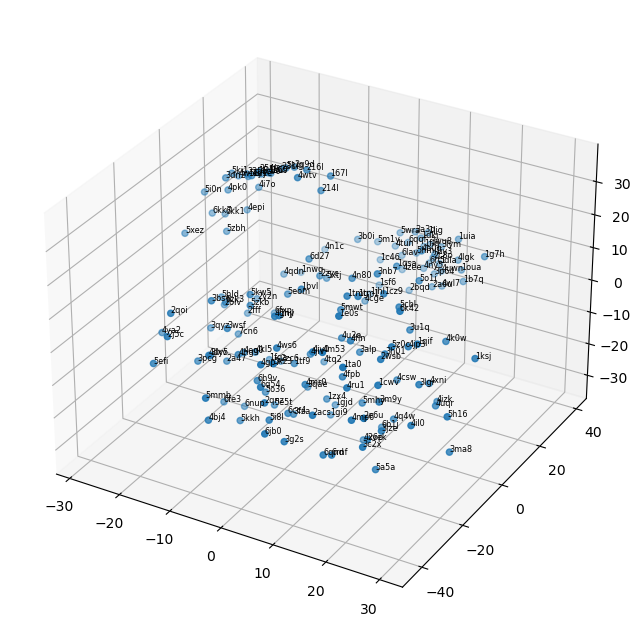

In [7]:
import seaborn as sns
x = [row[0] for row in factor_scores]
y = [row[1] for row in factor_scores]
z = [row[2] for row in factor_scores]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
for var, (x,y, z) in zip(names, factor_scores):
    ax.text(x, y, z, var, fontsize="xx-small", visible=True)
plt.show()

    